# PDF Scraper of Bulletin   

In [1]:
#!pip install PyPDF2
# FRÜHJAHRSSESSION 2016, 28. Febr. - 17. Mrz. 2016, 88 - 655

In [2]:
import PyPDF2
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
import dateutil.parser
import re
import time

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
datestring = time.strftime("%m-%h-%d")
datestring

'08-Aug-04'

# Getting all the pages

In [3]:
pdfFileObj = open('NR_5002_1603.pdf', 'rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages

get_page = 88  #500
whole_Text_FrSe = ''

for page in range(88, 650):  #88 #650
    pageObj = pdfReader.getPage(get_page) 
    Page = pageObj.extractText()
    get_page += 1
    whole_Text_FrSe = whole_Text_FrSe + Page

In [4]:
pdfFileObj = open('NR_5003_1604.pdf', 'rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages

get_page = 22
whole_Text_SonSe = ''

for page in range(22, 158):  #0 26
    pageObj = pdfReader.getPage(get_page) 
    Page = pageObj.extractText()
    get_page += 1
    whole_Text_SonSe = whole_Text_SonSe + Page

In [5]:
pdfFileObj = open('Bulletin_Sommersession_NR_5004_1606.pdf', 'rb')     #'rb' for read binary mode
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pdfReader.numPages

get_page = 80
whole_Text_SomSe = ''

for page in range(80, 587):  #0 26
    pageObj = pdfReader.getPage(get_page) 
    Page = pageObj.extractText()
    get_page += 1
    whole_Text_SomSe = whole_Text_SomSe + Page

In [6]:
whole_Text = whole_Text_FrSe + whole_Text_SonSe + whole_Text_SomSe

# Prepping the String

In [7]:
#Removing Zwischenrufe der Präsidentin
whole_Text = whole_Text.replace('(Zwischenruf', "") 
#Getting rid of \n, makes search through the document more difficult, because I can't use "." to find different characters
whole_Text = whole_Text.replace('\n', " ")
#Getting rid of double spaces
whole_Text = whole_Text.replace('  ', " ")
#Getting rid of '  -' spaces
whole_Text = whole_Text.replace('  -', " ")
#Getting rid of '  -' spaces
whole_Text = whole_Text.replace('-  ', " ")
#Getting rid of '- ' spaces
whole_Text = whole_Text.replace('- ', " ")
#Getting rid of ' -' spaces
whole_Text = whole_Text.replace(' -', " ")
#Formating –
whole_Text = whole_Text.replace('Œ', "–") 
#Headers and bottom of the page
#Bulletin officiel de l’Assemblée fédérale
whole_Text = whole_Text.replace('Bulletin officiel de l™Assemblée fédérale', " ")
#Bulletin officiel de l’Assemblée fédérale
whole_Text = whole_Text.replace('Amtliches Bulletin der Bundesversammlung', " ") 
#Removing confusing brackets
whole_Text = whole_Text.replace('(GE,JU, VS, TI)', '').replace('(GE, JU, VS, TI)','')
whole_Text = whole_Text.replace('(LU, SZ, GL, SO, BS, AI).', '')
#Removing page headers
whole_Text = whole_Text.replace('           Conseil national', '')
whole_Text = whole_Text.replace('Nationalrat           ', '')
#Deleting more brakets
whole_Text = re.sub(r'\([1-9]+\.[1-9]+\)', '', whole_Text) #(12.502)
whole_Text = re.sub(r'\(\s*[A-Z][a-z][A-Za-z]+\s*\)', '', whole_Text) #(KdK) #(Munz) #(Walter)
whole_Text = re.sub(r'\(\s*[A-Z][A-Z][A-Z]+\s*\)', '', whole_Text) #(KKK ) 
whole_Text = re.sub(r'\([A-Z[a-z]+\s*[A-Z[a-z]+\)', '', whole_Text) #(Erich Hess)
whole_Text = whole_Text.replace('\(Aktienrecht\)', '') #(Aktienrecht)

# Working on the Regular Expressions to extract the information

In [8]:
#Finding everthing in brackets, i.e. '(GL, AG)'
Partei_Kanton = re.findall(r"\([A-Z]+, [A-Z][A-Z]\)", whole_Text)
len(Partei_Kanton)

2423

In [9]:
#Get name from before the pattern (XY, XY), using the negavitve outlook:
#http://stackoverflow.com/questions/31713623/search-in-a-string-and-obtain-the-2-words-before-and-after-the-match-in-python
Personen_name = re.findall(r'\w*\s*\w+\b\s+\b[-\w|\w]+(?=\s*\([A-Z]+, [A-Z][A-Z]\))', whole_Text)
len(Personen_name)

2423

In [10]:
#Getting the whole text
Text = re.findall(r"[A-Z],\s+[A-Z][A-Z]\)(.*?)(Leuthard Doris|Sommaruga Simonetta|Schneider-Ammann Johann|Maurer Ueli|Burkhalter Didier|Berset Alain|Parmelin Guy|\w*\.Leuthard Doris|\w*\.Sommaruga Simonetta|\w*\.Schneider-Ammann Johann|\w*\.Maurer Ueli|\w*\.Burkhalter Didier|\w*\.Berset Alain|\w*\.Parmelin Guy|\()", whole_Text)
#Removing empty lists
Text = list(filter(None, Text))
#BEcause it also captures the Bundesrats name, when I don't want it two, I have unpack the lists
Text = ([ a for a,b in Text ], [ b for a,b in Text ])
#And then only take the first list
Text = Text[0]
len(Text)

2423

In [11]:
#for testing, because in the test the last text will never be included
#Partei_Kanton.pop()

In [12]:
#for testing, because in the test the last text will never be included
#Personen_name.pop()

In [13]:
def delete_Bundesrat(List):
    for x in List:
        x = re.sub(r'Simonetta Sommaruga,.*?$', '', x)
        x = re.sub(r'Maurer Ueli,.*?$', '', x) 
        x = re.sub(r'Leuthard Doris,.*?$', '', x) 
        x = re.sub(r'Burkhalter Didier,.*?$', '', x)
        x = re.sub(r'Berset Alain,.*?$', '', x)
        x = re.sub(r'Parmelin Guy,.*?$', '', x)
        return x

In [15]:
delete_Bundesrat(Text)

", pour le Bureau : Le Bureau a cons taté que l'élection de Madame Alice Glauser-Zufferey, née le 18 octobre 1954, originaire de Champvent dans le canton de Vaud et de Rüti bei Lyssach dans le canton de Berne, domi ciliée à Champvent, a été validée. Madame Glauser rem place Monsieur Guy Parmelin, élu au Conseil fédéral. Madame Glauser est la première des viennent-ensuite de la liste no 14 «UDC Vaud». Elle est paysanne et a siégé au Conseil national lors de la 48e législature. Le Conseil d'Etat du canton de Vaud l'a proclamée élue par arrêté du 16 dé cembre 2015. La publication a été faite dans la Feuille des avis officiels du canton de Vaud no 101 du 18 décembre 2015.Sur la base des indications communiquées par Madame Glauser, le Bureau n'a identifié aucune activité incompatible avec l'exercice d'un mandat parlementaire au sens de l'ar ticle 144 de la Constitution fédérale et de l'article 14 de la loi 14.095      Conseil national229 février 2016   sur le Parlement. Il propose dès lors 

In [16]:
def delete_Bundesrat2(List):
    for x in List:
        return x.replace('Bei diesem Block 2', '')

In [18]:
delete_Bundesrat2(Text)

", pour le Bureau : Le Bureau a cons taté que l'élection de Madame Alice Glauser-Zufferey, née le 18 octobre 1954, originaire de Champvent dans le canton de Vaud et de Rüti bei Lyssach dans le canton de Berne, domi ciliée à Champvent, a été validée. Madame Glauser rem place Monsieur Guy Parmelin, élu au Conseil fédéral. Madame Glauser est la première des viennent-ensuite de la liste no 14 «UDC Vaud». Elle est paysanne et a siégé au Conseil national lors de la 48e législature. Le Conseil d'Etat du canton de Vaud l'a proclamée élue par arrêté du 16 dé cembre 2015. La publication a été faite dans la Feuille des avis officiels du canton de Vaud no 101 du 18 décembre 2015.Sur la base des indications communiquées par Madame Glauser, le Bureau n'a identifié aucune activité incompatible avec l'exercice d'un mandat parlementaire au sens de l'ar ticle 144 de la Constitution fédérale et de l'article 14 de la loi 14.095      Conseil national229 février 2016   sur le Parlement. Il propose dès lors 

In [19]:
#Starting Dictionary
Dict_List = []
Dict_Text = []
for Partei_Kanton, Name, Talk in zip(Partei_Kanton, Personen_name, Text):
        
        #Getting Partei
        Partei = re.search(r'[A-Z]+,', Partei_Kanton)
        Partei = Partei.group().replace(',', '')
    
        #Getting Kanton
        Kanton = re.search(r', [A-Z][A-Z]', Partei_Kanton)
        Kanton = Kanton.group().replace(', ', '')
        
        #Getting Name
        Name = Name.replace('  ', ' ').strip()
        Name = Name.replace('16 ', '')
        Name = re.sub(r'[0-9]*', '', Name).strip()
        
        #Sometimes the Regex grabs words is should, so I am filtering them out here. Not ideal though.
        Name = Name.replace('motion', '').replace('fédérale', '').replace('Etats', '').replace('postulat', '').replace('initiative', '').replace('Maintenir', '').replace('sports', '').replace('finances', '').replace('Biffer', '').strip()
        Name = Name.replace('matière ', '').replace('renvoi', '').replace('intérieur ', '').strip()
        
        #I still need to get rid of name at the end of each talk:
        #Talk
        
        #Getting lenght of talk
        Talk_len = len(Talk)
    
        Dict = {'Partei': Partei,
               'Kanton': Kanton,
               'Name': Name,
                'Reden_Länge': Talk_len
               }
        
        Text_Book = {'Partei': Partei,
               'Kanton': Kanton,
               'Name': Name,
                'Reden': Talk,
                'Reden_Länge': Talk_len
               }
        Dict_List.append(Dict)
        Dict_Text.append(Text_Book)

# Working with the Dataframe

In [167]:
#Making the DataFrame for politicians & 
df = pd.DataFrame(Dict_List)

In [168]:
#Making DataFrame to look up texts
df_Text = pd.DataFrame(Dict_Text)

In [169]:
df.head()

,Kanton,Name,Partei,Reden_Länge
0,VD,Nordmann Roger,S,1077
1,BE,Bertschy Kathrin,GL,7487
2,FR,Rime Jean-François,V,2353
3,VD,Schwaab Jean Christophe,S,425
4,FR,Rime Jean-François,V,597


## The Total number of minutes speech time per party

In [170]:
#What is the average reading speed per minute. Slide presentations are around
#120 words per minute, but these are policy speakers, who speak faster. 
#we'll word with the average: 200 words per minute. https://en.wikipedia.org/wiki/Words_per_minute
#Average word length in German is 5 - 6. We'll work with 5.5.

df['Rede Minuten'] = df['Reden_Länge'] / 1100

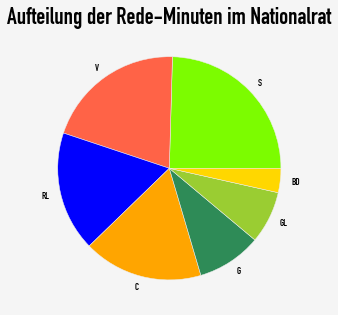

In [171]:
#Making the plot look nice:
#http://jonathansoma.com/lede/data-studio/classes/tufte/matplotlib-styles-data-ink-and-annotation/

# Making default font 
matplotlib.rcParams['font.sans-serif'] = "DIN Condensed"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "DIN Condensed"

fig, ax = plt.subplots(figsize =(5,5), facecolor='WhiteSmoke')

df_TOTAL_MINs = df.groupby('Partei')['Rede Minuten'].sum().sort_values(ascending=False).plot(kind='pie', colors=['LawnGreen', 'tomato', 'b', 'orange', 'SeaGreen', 'YellowGreen', 'Gold'], ax=ax)
ax.set_ylabel("")

#Setting title
ax.set_title("Aufteilung der Rede-Minuten im Nationalrat", fontname='DIN Condensed', fontsize=24)




In [210]:
df.groupby('Partei')['Rede Minuten'].sum().sort_values

<bound method Series.sort_values of Partei
BD     173.574545
C      687.046364
G      444.893636
GL     376.623636
RL     851.364545
S     1125.958182
V      964.722727
Name: Rede Minuten, dtype: float64>

In [172]:
#This looks as though it corresponds pretty well to the percentages of
#the various parties in parliament. Lets have a closer look though. What is the 
#Total number of minutes?

In [173]:
#creating dataframe
df_TOTAL_MINs = df.groupby('Partei')['Rede Minuten'].sum()
df_TOTAL_MINs = pd.DataFrame(df_TOTAL_MINs)
#Re-Indexing
df_TOTAL_MINs.reset_index(inplace=True)
#Creating Anteil
df_TOTAL_MINs['Anteil'] = df_TOTAL_MINs['Rede Minuten'] / df['Rede Minuten'].sum() * 100

In [174]:
#Comparing to atual size of the party. Franktionen here:
#https://www.parlament.ch/de/organe/fraktionen
#Check this against the speeches
df_NR_FRAKTIONEN = pd.read_csv("FRAKTIONEN_NR.csv")
df_TOTAL_MINs = df_TOTAL_MINs.merge(df_NR_FRAKTIONEN, left_on = 'Partei', right_on ='Partei') 
#Renaming the columns
df_TOTAL_MINs.columns = ['Partei', 'Rede Minuten', 'Anteil Reden', 'Anzahl Mitglieder', 'Anteil im Parlament']
#Working out the percentage gained or lost
df_TOTAL_MINs['Gewinn_Verlust'] = df_TOTAL_MINs['Anteil Reden'] - df_TOTAL_MINs['Anteil im Parlament']
#Working out the minutes gaines or lost
df_TOTAL_MINs['In Minuten'] = df_TOTAL_MINs['Gewinn_Verlust'] * (df['Rede Minuten'].sum() / 100)

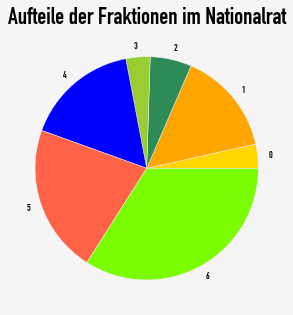

In [175]:
# Anteile im Parlament
# Making default font 
matplotlib.rcParams['font.sans-serif'] = "DIN Condensed"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "DIN Condensed"

fig, ax = plt.subplots(figsize =(5,5), facecolor='WhiteSmoke')

df_TOTAL_MINs['Anteil im Parlament'].plot(kind='pie', colors=['Gold', 'orange', 'SeaGreen', 'YellowGreen', 'b', 'tomato',  'LawnGreen'], ax=ax)
ax.set_ylabel("")

#Setting title
ax.set_title("Aufteile der Fraktionen im Nationalrat", fontname='DIN Condensed', fontsize=24)

In [211]:
df_TOTAL_MINs['Anteil im Parlament']

0     3.5
1    15.0
2     6.0
3     3.5
4    16.5
5    21.5
6    34.0
Name: Anteil im Parlament, dtype: float64

In [176]:
df_TOTAL_MINs

,Partei,Rede Minuten,Anteil Reden,Anzahl Mitglieder,Anteil im Parlament,Gewinn_Verlust,In Minuten
0,BD,174.105455,3.507192,7,3.5,0.007192,0.357023
1,C,859.108182,17.305933,30,15.0,2.305933,114.472045
2,G,463.773636,9.342287,12,6.0,3.342287,165.919182
3,GL,376.623636,7.586732,7,3.5,4.086732,202.875205
4,RL,862.537273,17.375008,33,16.5,0.875008,43.437523
5,S,1218.880000,24.553200,43,21.5,3.053200,151.568205
6,V,1009.212727,20.329648,68,34.0,-13.670352,-678.629182


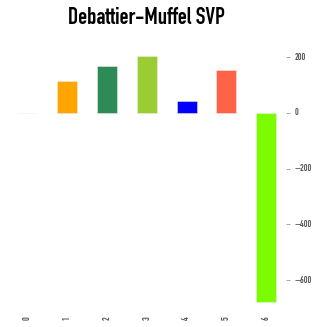

In [177]:
#Gewinner und Verlierer 

fig, ax = plt.subplots(figsize =(5,5), facecolor='White')
df_TOTAL_MINs['In Minuten'].plot(kind='bar', color=['Gold', 'orange', 'SeaGreen', 'YellowGreen', 'b', 'tomato',  'LawnGreen'])

ax.set_title("Die Grünen und Grünliberalen im Plus", fontname='DIN Condensed', fontsize=24)

ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.set_axis_bgcolor("White")

plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='off',
    right='on',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='on',
    labelleft='off')

ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Debattier-Muffel SVP", fontname='DIN Condensed', fontsize=24)
plt.savefig('2.pdf', transparent=True, bbox_inches='tight')

In [178]:
df_TOTAL_MINs['In Minuten']

0      0.357023
1    114.472045
2    165.919182
3    202.875205
4     43.437523
5    151.568205
6   -678.629182
Name: In Minuten, dtype: float64

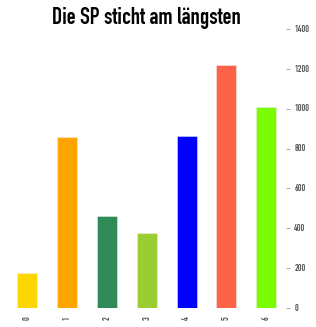

In [179]:
fig, ax = plt.subplots(figsize =(5,5), facecolor='White')
df_TOTAL_MINs['Rede Minuten'].plot(kind='bar', color=['Gold', 'orange', 'SeaGreen', 'YellowGreen', 'b', 'tomato',  'LawnGreen'])

ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.set_axis_bgcolor("White")

plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='off',
    right='on',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='on',
    labelleft='off')

ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Die SP sticht am längsten", fontname='DIN Condensed', fontsize=24)
plt.savefig('1.pdf', transparent=True, bbox_inches='tight')

## Now lets look at the Cantons

In [180]:
#First, was is the average speech length:
df['Rede Minuten'].mean()

2.0487993846846511

In [181]:
df['Rede Minuten'].median()

1.6854545454545455

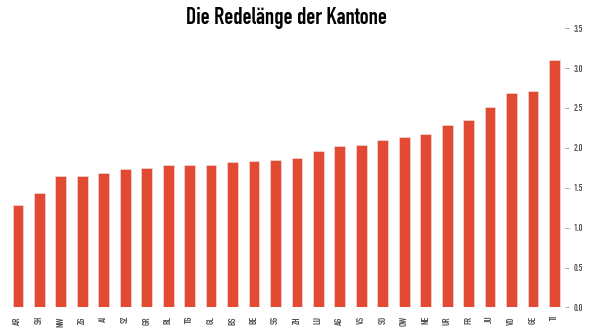

In [182]:
fig, ax = plt.subplots(figsize =(10,5), facecolor='White')
df.groupby('Kanton')['Rede Minuten'].mean().sort_values(ascending=True).plot(kind='bar')
ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.set_axis_bgcolor("White")

plt.tick_params(
    #axis='x',
    top='off',
    which='major',
    left='off',
    right='on',
    bottom='off',
    labeltop='off',
    labelbottom='on',
    labelright='on',
    labelleft='off')

ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Die Redelänge der Kantone", fontname='DIN Condensed', fontsize=24)
plt.savefig('6.pdf', transparent=True, bbox_inches='tight')

In [183]:
#lets try a scatter plot, marking Kantons from East to West, 1 - 26. First I need to create that file and import it. 

In [184]:
df_ostwest = pd.read_csv("reden_ostwest.csv")

In [185]:
df = df.merge(df_ostwest, left_on = 'Kanton', right_on ='Kanton') 

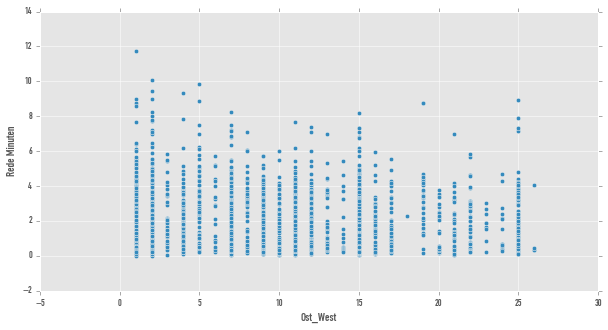

In [186]:
#UR is missing
fig, ax = plt.subplots(figsize =(10,5), facecolor='White')
df.plot(kind='scatter', x='Ost_West', y='Rede Minuten', ax=ax, marker='o')

In [187]:
#No Correlation
df.corr()

,Reden_Länge,Rede Minuten,Ost_West
Reden_Länge,1.000000,1.000000,-0.125813
Rede Minuten,1.000000,1.000000,-0.125813
Ost_West,-0.125813,-0.125813,1.000000


# Looking into gender differences

In [188]:
#Preparing the dataframe for sex of NR
df_NR_extended = pd.read_csv("National- und Ständeräte - NR.csv")

In [189]:
#Meging the Dataframe
df = df.merge(df_NR_extended, left_on = 'Name', right_on ='Name') 

In [190]:
df.groupby('Geschlecht')['Rede Minuten'].mean()

Geschlecht
m    1.993154
w    2.136069
Name: Rede Minuten, dtype: float64

In [191]:
df.head(1)

,Kanton_x,Name,Partei,Reden_Länge,Rede Minuten,Ost_West,Rat,Anrede 1,Geschlecht,Vorname,...,PLZ (Mailing),Ort (Mailing),Tel. (Mailing),Fax (Mailing),Homepage (Mailing),Arbeitssprache,Fraktion,Kanton_y,Geburtsjahr,VereidigungsDatum
0,VD,Nordmann Roger,S,1077,0.979091,2,NR,Monsieur,m,Roger,...,1003,Lausanne,#ERROR!,NaN,www.roger-nordmann.ch,f,S,VD,1973,2004


In [192]:
df.groupby('Arbeitssprache')['Rede Minuten'].mean()

Arbeitssprache
d    1.893554
f    2.472177
Name: Rede Minuten, dtype: float64

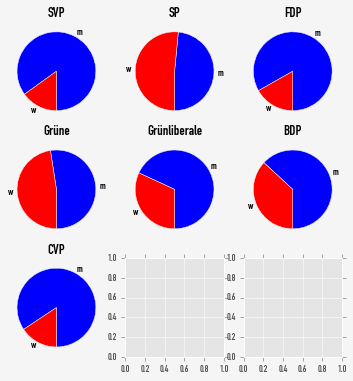

In [193]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(facecolor='WhiteSmoke', nrows=3, ncols=3, figsize=(6,6))

df[df['Partei'] == 'V'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax1, kind='pie', startangle=270, colors=['b', 'r'])
ax1.set_title("SVP")
df[df['Partei'] == 'S'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax2, kind='pie', startangle=270, colors=['b', 'r'])
ax2.set_title("SP")
df[df['Partei'] == 'RL'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax3, kind='pie', startangle=270, colors=['b', 'r'])
ax3.set_title("FDP")
df[df['Partei'] == 'G'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax4, kind='pie', startangle=270, colors=['b', 'r'])
ax4.set_title("Grüne")
df[df['Partei'] == 'GL'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax5, kind='pie', startangle=270, colors=['b', 'r'])
ax5.set_title("Grünliberale")
df[df['Partei'] == 'BD'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax6, kind='pie', startangle=270, colors=['b', 'r'])
ax6.set_title("BDP")
df[df['Partei'] == 'C'].groupby('Geschlecht')['Rede Minuten'].sum().plot(ax=ax7, kind='pie', startangle=270, colors=['b', 'r'])
ax7.set_title("CVP")

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax6.set_ylabel('')
ax7.set_ylabel('')


#ax1.set_title("Anteil Redelängen, Männer vs. Frauen", fontname='DIN Condensed', fontsize=24)
#plt.tight_layout()
plt.savefig('4.pdf', transparent=True, bbox_inches='tight')

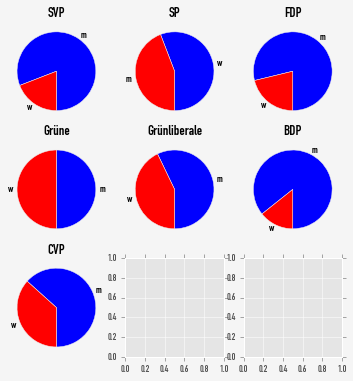

In [194]:
#Comparing that to actual size of woman votes.

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(facecolor='WhiteSmoke', nrows=3, ncols=3, figsize=(6,6))

df_NR_extended[df_NR_extended['Fraktion'] == 'V']['Geschlecht'].value_counts().plot(ax=ax1, kind='pie', startangle=270, colors=['b', 'r'])
ax1.set_title("SVP")
df_NR_extended[df_NR_extended['Fraktion'] == 'S']['Geschlecht'].value_counts().plot(ax=ax2, kind='pie', startangle=270, colors=['b', 'r'])
ax2.set_title("SP")
df_NR_extended[df_NR_extended['Fraktion'] == 'RL']['Geschlecht'].value_counts().plot(ax=ax3, kind='pie', startangle=270, colors=['b', 'r'])
ax3.set_title("FDP")
df_NR_extended[df_NR_extended['Fraktion'] == 'G']['Geschlecht'].value_counts().plot(ax=ax4, kind='pie', startangle=270, colors=['b', 'r'])
ax4.set_title("Grüne")
df_NR_extended[df_NR_extended['Fraktion'] == 'GL']['Geschlecht'].value_counts().plot(ax=ax5, kind='pie', startangle=270, colors=['b', 'r'])
ax5.set_title("Grünliberale")
df_NR_extended[df_NR_extended['Fraktion'] == 'BD']['Geschlecht'].value_counts().plot(ax=ax6, kind='pie', startangle=270, colors=['b', 'r'])
ax6.set_title("BDP")
df_NR_extended[df_NR_extended['Fraktion'] == 'C']['Geschlecht'].value_counts().plot(ax=ax7, kind='pie', startangle=270, colors=['b', 'r'])
ax7.set_title("CVP")

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax6.set_ylabel('')
ax7.set_ylabel('')

plt.savefig('5.pdf', transparent=True, bbox_inches='tight')

# The biggest Chatter Boxes

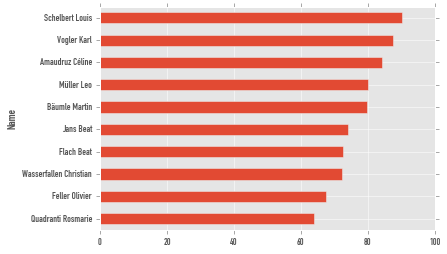

In [195]:
df.groupby('Name')['Rede Minuten'].sum().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.savefig('3.pdf', transparent=True, bbox_inches='tight')

In [214]:
df.groupby('Name')['Rede Minuten'].sum().sort_values(ascending=True).tail(10)

Name
Quadranti Rosmarie        64.033636
Feller Olivier            67.586364
Wasserfallen Christian    72.179091
Flach Beat                72.719091
Jans Beat                 74.096364
Bäumle Martin             79.701818
Müller Leo                79.980000
Amaudruz Céline           84.260909
Vogler Karl               87.406364
Schelbert Louis           90.211818
Name: Rede Minuten, dtype: float64

In [196]:
df.groupby('Name')['Rede Minuten'].sum().describe()

count    178.000000
mean      25.978560
std       19.755450
min        0.356364
25%        9.784091
50%       20.645000
75%       35.663409
max       90.211818
Name: Rede Minuten, dtype: float64

In [197]:
df.groupby('Name')['Reden_Länge'].sum().sort_values(ascending=False).head()

Name
Schelbert Louis    99233
Vogler Karl        96147
Amaudruz Céline    92687
Müller Leo         87978
Bäumle Martin      87672
Name: Reden_Länge, dtype: int64

# The Silent Ones

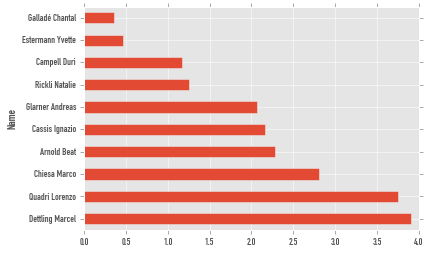

In [198]:
df.groupby('Name')['Rede Minuten'].sum().sort_values(ascending=False).tail(10).plot(kind='barh')

In [199]:
df_Text[df_Text['Name'] == 'Aeschi Thomas']  

,Kanton,Name,Partei,Reden,Reden_Länge
41,ZG,Aeschi Thomas,V,: In welchen Situationen werden Praktika absol...,1823
105,ZG,Aeschi Thomas,V,": Wie erwähnt wurde, geht es beim Entsendegese...",2262
319,ZG,Aeschi Thomas,V,: Der EU-Botschafter in Eritrea ist klar der M...,388
402,ZG,Aeschi Thomas,V,: Die SVP-Fraktion hatte ursprüng lich die Sis...,1648
404,ZG,Aeschi Thomas,V,: Wir haben heute eine Regelung für Expatriate...,1714
412,ZG,Aeschi Thomas,V,: Das hier ist eine kleinere Minder heit. Sie ...,1255
415,ZG,Aeschi Thomas,V,: Wir sind jetzt auf Seite 7 der deutschsprach...,2203
426,ZG,Aeschi Thomas,V,": Wir sind, wie eben die Frau Präsi dentin aus...",1962
432,ZG,Aeschi Thomas,V,: Wo liegt das Problem? Das Pro blem liegt dar...,1247
439,ZG,Aeschi Thomas,V,": Bei Absatz 5 geht es um eine Lex Ticino, kön...",979


In [200]:
df_Text[df_Text['Name'] == 'Schelbert Louis'].to_csv('schelbert_check.csv', index=False)
df_Text[df_Text['Name'] == 'Vogler Karl'].to_csv('vogler_check.csv', index=False)


In [201]:
df['Reden_Länge'].describe()

count     2274.000000
mean      2236.852243
std       1869.519428
min          7.000000
25%        553.250000
50%       1819.000000
75%       3510.000000
max      12888.000000
Name: Reden_Länge, dtype: float64

In [202]:
df['Rede Minuten'].sort_values(ascending=False)
df[df['Reden_Länge'] == 12888]

,Kanton_x,Name,Partei,Reden_Länge,Rede Minuten,Ost_West,Rat,Anrede 1,Geschlecht,Vorname,...,PLZ (Mailing),Ort (Mailing),Tel. (Mailing),Fax (Mailing),Homepage (Mailing),Arbeitssprache,Fraktion,Kanton_y,Geburtsjahr,VereidigungsDatum
1110,GE,Amaudruz Céline,V,12888,11.716364,1,NR,Madame,w,Céline,...,1206,Genève,NaN,NaN,NaN,f,V,GE,1979,2011


In [203]:
df_Text[df_Text['Name'] == 'Amaudruz Céline'].to_csv('amaudraz.csv', index=False)

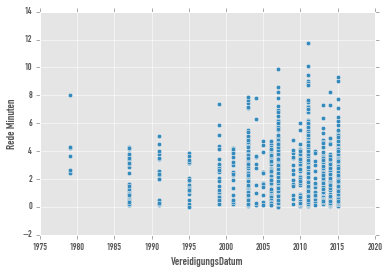

In [204]:
df.plot(kind='scatter', x='VereidigungsDatum', y='Rede Minuten')

In [205]:
df.corr()

,Reden_Länge,Rede Minuten,Ost_West,PLZ (Postadresse),Geburtsjahr,VereidigungsDatum
Reden_Länge,1.000000,1.000000,-0.123749,-0.119673,0.051451,0.024965
Rede Minuten,1.000000,1.000000,-0.123749,-0.119673,0.051451,0.024965
Ost_West,-0.123749,-0.123749,1.000000,0.888829,-0.159586,-0.011663
PLZ (Postadresse),-0.119673,-0.119673,0.888829,1.000000,0.064177,0.241331
Geburtsjahr,0.051451,0.051451,-0.159586,0.064177,1.000000,0.497498
VereidigungsDatum,0.024965,0.024965,-0.011663,0.241331,0.497498,1.000000


# Speech Length and Party

In [206]:
df_Skala = pd.read_csv("Skala4.csv")
df = df.merge(df_Skala, left_on = 'Partei', right_on ='Partei') 

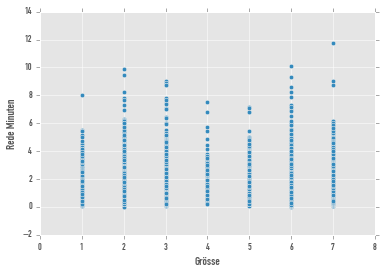

In [207]:
df.plot(kind='scatter', y='Rede Minuten', x='Grösse')

# Scatter Plot Sum of Talks and Party

In [208]:
SUM = pd.DataFrame(df.groupby('Name')['Rede Minuten'].sum())
SUM.reset_index(inplace=True)
SUM = SUM.merge(df, left_on = 'Name', right_on ='Name') 

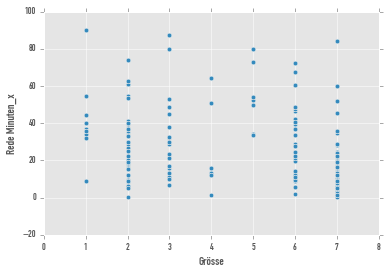

In [209]:
SUM.plot(kind='scatter', x='Grösse', y='Rede Minuten_x')